In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['review_scores_checkin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_checkin
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['review_scores_checkin'].max()
Min = Mexico['review_scores_checkin'].min()
Limites = [Min, Max]
Limites

[4.0, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.06373636189094067

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (4, 5, 16)
intervalos

array([4.        , 4.06666667, 4.13333333, 4.2       , 4.26666667,
       4.33333333, 4.4       , 4.46666667, 4.53333333, 4.6       ,
       4.66666667, 4.73333333, 4.8       , 4.86666667, 4.93333333,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Muy malo",
    "Malo",
    "Algo malo",
    "Regular",
    "Aceptable",
    "Suficiente",
    "Bueno",
    "Muy bueno",
    "Excelente",
    "Impecable",
    "Perfecto",
    "Extraordinario",
    "Eficiente",
    "Sin complicaciones",
    "Excepcional"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['review_scores_checkin'] = pd.cut ( x = Mexico ['review_scores_checkin'], bins = intervalos, labels = categorias )
Mexico['review_scores_checkin']

0        Sin complicaciones
1        Sin complicaciones
2               Excepcional
3               Excepcional
4               Excepcional
                ...        
26577    Sin complicaciones
26578    Sin complicaciones
26579    Sin complicaciones
26580    Sin complicaciones
26581    Sin complicaciones
Name: review_scores_checkin, Length: 26582, dtype: category
Categories (15, object): ['Muy malo' < 'Malo' < 'Algo malo' < 'Regular' ... 'Extraordinario' < 'Eficiente' < 'Sin complicaciones' < 'Excepcional']

In [12]:
table1 = freq_tbl(Mexico['review_scores_checkin'])
table1

,review_scores_checkin,frequency,percentage,cumulative_perc
0,Excepcional,10587,0.398277,0.402609
1,Sin complicaciones,8564,0.322173,0.728286
2,Eficiente,2369,0.089120,0.818375
3,Extraordinario,1846,0.069445,0.888576
4,Perfecto,1194,0.044918,0.933982
5,Excelente,405,0.015236,0.949384
6,Impecable,388,0.014596,0.964139
7,Muy bueno,385,0.014483,0.978780
8,Aceptable,150,0.005643,0.984484
9,Bueno,117,0.004401,0.988934


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_checkin,frequency
0,Excepcional,10587
1,Sin complicaciones,8564
2,Eficiente,2369
3,Extraordinario,1846
4,Perfecto,1194
5,Excelente,405
6,Impecable,388
7,Muy bueno,385
8,Aceptable,150
9,Bueno,117


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_checkin')
Filtro_index

,frequency
review_scores_checkin,
Excepcional,10587
Sin complicaciones,8564
Eficiente,2369
Extraordinario,1846
Perfecto,1194
Excelente,405
Impecable,388
Muy bueno,385
Aceptable,150


Text(0, 0.5, 'Frecuencia')

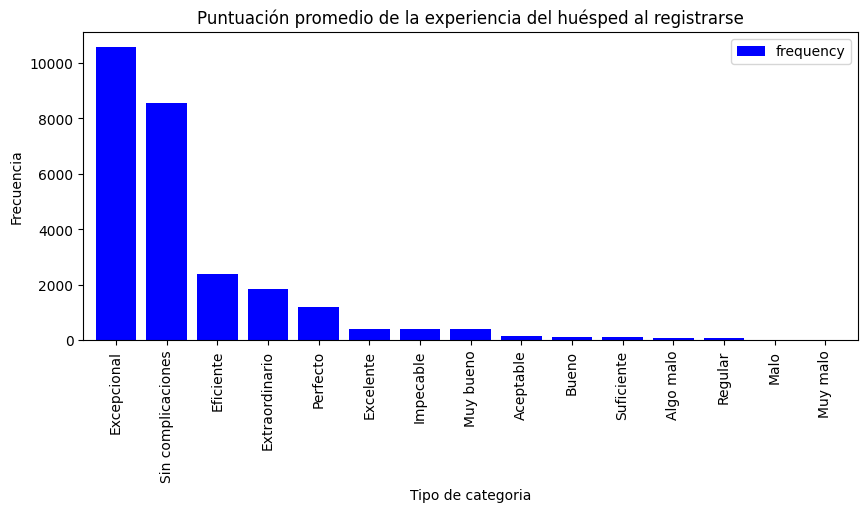

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de la experiencia del huésped al registrarse')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')